In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Data understanding and data cleaning
Data semantics -
Distribution of the variables and statistics - 
Assessing data quality (missing values, outliers) - 
Variables transformations -
Pairwise correlations and eventual elimination of redundant variables 

In [3]:
import numpy as np
import pandas as pd
from matplotlib import *
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import altair as alt


In [4]:
df = pd.read_csv('/content/drive/Shareddrives/GRUPPO 2 EX E THE BEST/DMML/Adult_Income.csv', skipinitialspace=True)

Mettiamo il dataset originale dentro la var df_original

In [5]:
df_original = df.copy(deep=True)

In [6]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Verifico la shape del dataset, ha 48 mila righe. Poi controllo i  valori unici per ciascuno dei 16 attributi

In [8]:
df.shape

(48842, 15)

Osserviamo che education ha due classi di ugual misura in termini di valori unici, dunque andrà investigato se uno dei due può essere rimosso in quanto ridondante.

In [9]:
df.nunique()

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [10]:
df.duplicated().sum()

52

Osservo che ci sono due attributi riferiti ad Education, li visualizzo accanto e noto che forniscono la stessa informazione: il primo in forma categorica, il secondo in forma numerica. Per ora li tengo entrambi, poi vedo quale dei due rimuovere. 

In [11]:
df[['education', 'educational-num']].groupby(['education'], as_index=False).mean().sort_values(by='educational-num', ascending=False)

,education,educational-num
10,Doctorate,16
14,Prof-school,15
12,Masters,14
9,Bachelors,13
7,Assoc-acdm,12
8,Assoc-voc,11
15,Some-college,10
11,HS-grad,9
2,12th,8
1,11th,7


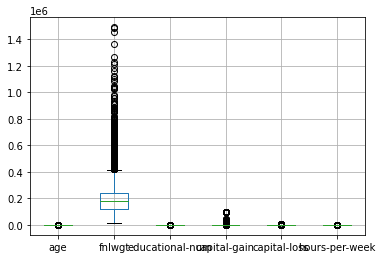

In [12]:
#verifico gli outliers
df.boxplot()

In [13]:
alt.data_transformers.disable_max_rows()
a=alt.Chart(df).mark_boxplot().encode(
    x='fnlwgt:Q'
)

alt.data_transformers.disable_max_rows()
b=alt.Chart(df).mark_boxplot().encode(
    x='age:Q'
)

alt.data_transformers.disable_max_rows()
c=alt.Chart(df).mark_boxplot().encode(
    x='capital-gain:Q'
)

alt.data_transformers.disable_max_rows()
d=alt.Chart(df).mark_boxplot().encode(
    x='educational-num:Q'
)

alt.data_transformers.disable_max_rows()
e=alt.Chart(df).mark_boxplot().encode(
    x='capital-loss:Q'
)


alt.data_transformers.disable_max_rows()
f=alt.Chart(df).mark_boxplot().encode(
    x='hours-per-week:Q'
)

alt.vconcat(a,b,c,d,e,f)

Output hidden; open in https://colab.research.google.com to view.

In [14]:

alt.data_transformers.disable_max_rows()
alt.Chart(df).mark_boxplot().encode(
          x='fnlwgt:Q'
  )

Output hidden; open in https://colab.research.google.com to view.

Verifico le distribuzioni dei valori per ciascuna classe

In [15]:
cols =df.columns
for i in cols:
    print(i,':')
    print('')
    print(df[i].value_counts())
    print('')

age :

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

workclass :

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

fnlwgt :

203488    21
190290    19
120277    19
125892    18
126569    18
          ..
131379     1
160061     1
334224     1
45381      1
208174     1
Name: fnlwgt, Length: 28523, dtype: int64

education :

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool         

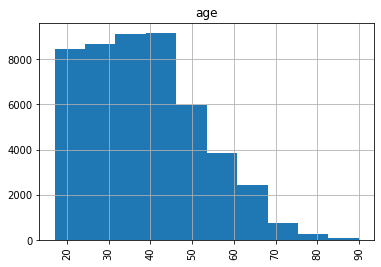

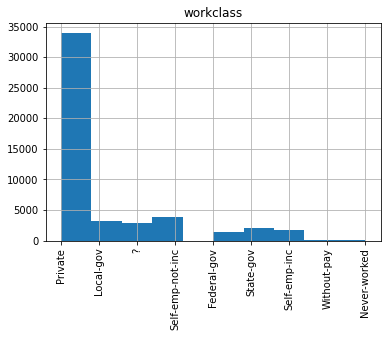

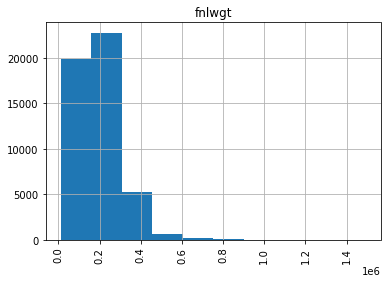

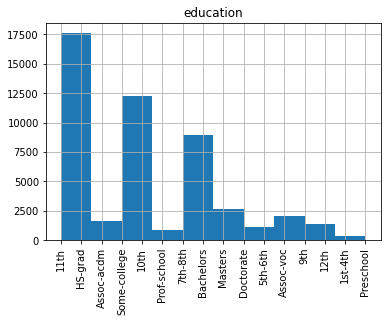

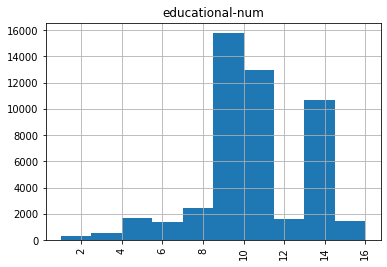

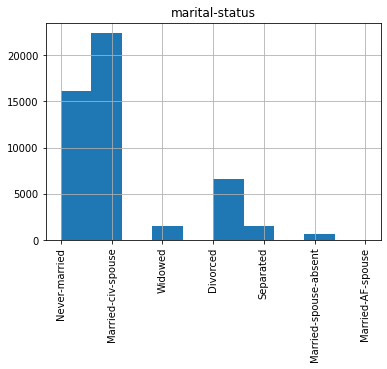

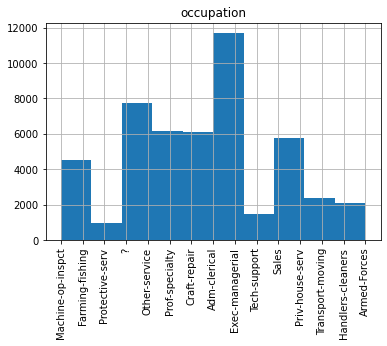

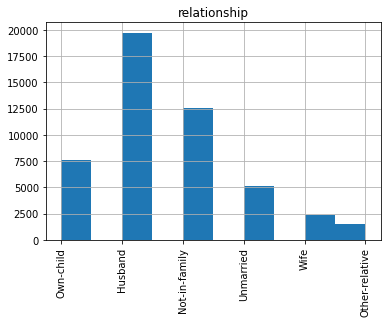

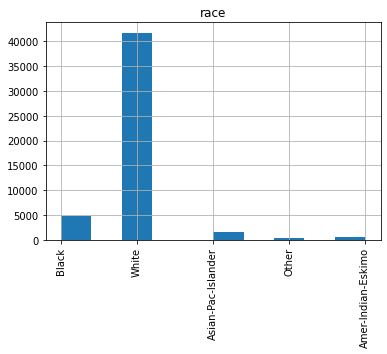

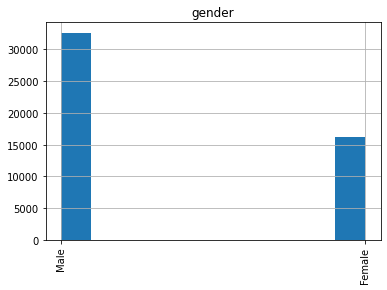

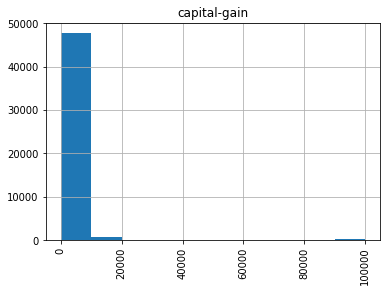

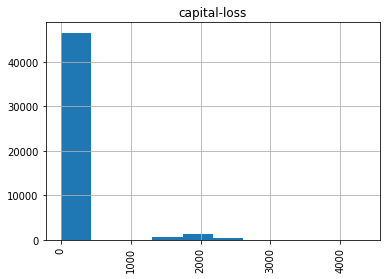

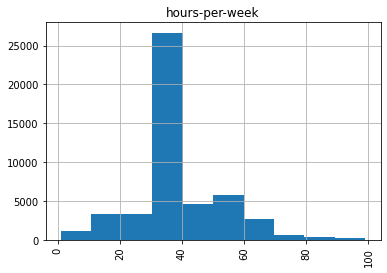

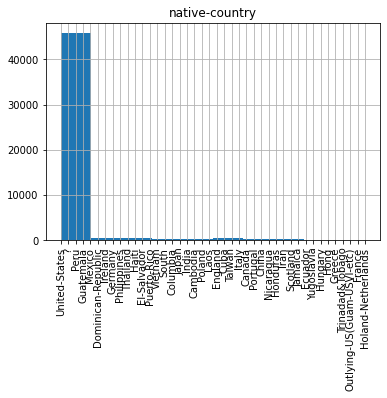

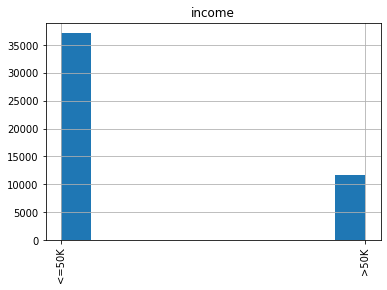

In [16]:
# titles=df.columns.tolist()
for i in df.columns:
  df[i].hist()
  plt.xticks(rotation=90)
  plt.title(label=i)
  plt.show()

In [17]:
import altair as alt

In [18]:
alt.Chart(df).mark_bar(tooltip=True).encode(
    y=alt.Y('workclass:N',  
            title='workclass'),
    x=alt.X('count(workclass)')

)

Output hidden; open in https://colab.research.google.com to view.

In [19]:
alt.Chart(df).mark_bar(tooltip=True).encode(
    y=alt.Y('education:N',  
            title='education'),
    x=alt.X('count(education)')

)

Output hidden; open in https://colab.research.google.com to view.

In [20]:
alt.Chart(df).mark_bar(tooltip=True).encode(
    y=alt.Y('educational-num:N',  
            title='educational-num'),
    x=alt.X('count(educational-num)')

)

Output hidden; open in https://colab.research.google.com to view.

In [21]:
alt.Chart(df).mark_bar(tooltip=True).encode(
    y=alt.Y('marital-status:N',  
            title='marital-status'),
    x=alt.X('count(marital-status)')

)

Output hidden; open in https://colab.research.google.com to view.

In [22]:
alt.Chart(df).mark_bar(tooltip=True).encode(
    y=alt.Y('occupation:N',  
            title='occupation'),
    x=alt.X('count(occupation)')

)

Output hidden; open in https://colab.research.google.com to view.

In [23]:
alt.Chart(df).mark_bar(tooltip=True).encode(
    y=alt.Y('relationship:N',  
            title='relationship'),
    x=alt.X('count(relationship)')

)

Output hidden; open in https://colab.research.google.com to view.

In [24]:
alt.Chart(df).mark_bar(tooltip=True).encode(
    y=alt.Y('race:N',  
            title='race'),
    x=alt.X('count(race)')

)

Output hidden; open in https://colab.research.google.com to view.

In [25]:
alt.Chart(df).mark_bar(tooltip=True).encode(
    y=alt.Y('gender:N',  
            title='gender'),
    x=alt.X('count(gender)')

)

Output hidden; open in https://colab.research.google.com to view.

In [26]:
alt.Chart(df).mark_bar(tooltip=True).encode(
    x=alt.X('native-country:N',  
            title='native-country'),
    y=alt.Y('count(native-country)')

)

Output hidden; open in https://colab.research.google.com to view.

In [27]:
alt.Chart(df).mark_bar(tooltip=True).encode(
    y=alt.Y('income:N',  
            title='income'),
    x=alt.X('count(income)')

)

Output hidden; open in https://colab.research.google.com to view.

Cerco i missing values, apparentemente non ci sono ma ci sono dei '?', li cerco e li quantifico e decido se rimuoverli o se sostituirli con il valore più frequente di quella classe


In [28]:
#nessun missing apparente, ma ci sono i ?
df.isnull().any().sum()

0

In [29]:
#rendo i ? dei Nan
df = df.replace('?', np.nan)

In [30]:
#mostro in percentuale quanto coprono i missing values e noto che solo variabili categoriche sono affette, dunque difficili da sostituire se non con la moda
df.isnull().sum()/len(df)*100

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

sostituisco i nan con le mode

In [31]:
df['native-country'].fillna(df['native-country'].mode()[0],inplace = True)
df['workclass'].fillna(df['workclass'].mode()[0],inplace = True)
df['occupation'].fillna(df['occupation'].mode()[0],inplace = True)
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

La variabile target è income, osservo la sua distribuzione e la mappo in 0 e 1

In [32]:
df['income-mapped']= [1 if income == '>50K' else 0 for income in df['income']]
df
#oppure df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income-mapped
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,18,Private,103497,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [33]:
#osservo variabile target 
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

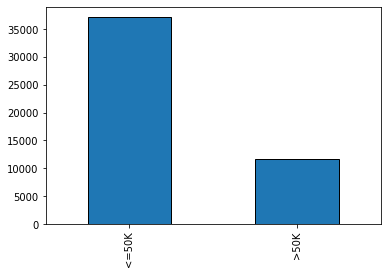

In [34]:
df['income'].value_counts().plot(kind='bar', edgecolor='black')
plt.show()
#vedere come si distribuisce la variabile target

Cerco se c'è correlazione tra le classe numeriche (non c'è)

In [35]:
import seaborn as sns

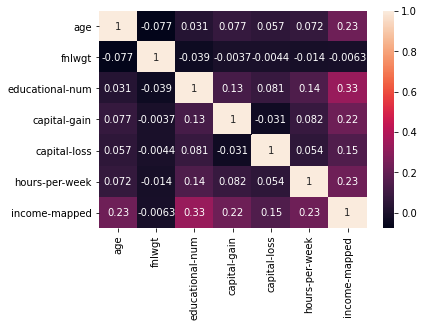

In [36]:
#osservo che non c'è alcuna correlazione significante
sns.heatmap(df.corr(), annot=True)

Rimuovo la variabile fnlwgt in quanto è "The continuous variable fnlwgt represents final weight, which is the number of units in the target population that the responding unit represents" 
e non la ritengo interessante per le analisi.

Rimuovo anche Education, in quanto ho già le stesse info dentro Educational num.

In [37]:
df.drop(['fnlwgt'], axis=1, inplace=True)

In [38]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income-mapped
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K,0


Dato il numero sproporzionato dei native country, decido di mappare a 1 per US e 0 per il resto del mondo

In [39]:
df['native-country'].value_counts()/len(df)*100

United-States                 91.497072
Mexico                         1.947095
Philippines                    0.603988
Germany                        0.421768
Puerto-Rico                    0.376725
Canada                         0.372630
El-Salvador                    0.317350
India                          0.309160
Cuba                           0.282544
England                        0.260022
China                          0.249785
South                          0.235453
Jamaica                        0.217026
Italy                          0.214979
Dominican-Republic             0.210884
Japan                          0.188362
Guatemala                      0.180173
Poland                         0.178125
Vietnam                        0.176078
Columbia                       0.174031
Haiti                          0.153556
Portugal                       0.137177
Taiwan                         0.133082
Iran                           0.120798
Nicaragua                      0.100323


In [40]:
df['native-country-mapped']= [1 if state == 'United-States' else 0 for state in df['native-country']]
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income-mapped,native-country-mapped
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,1
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,1
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,1
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K,0,1


In [41]:
df.groupby('native-country-mapped')['age'].mean()
df['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

Analisi bivariata

<Figure size 720x360 with 0 Axes>

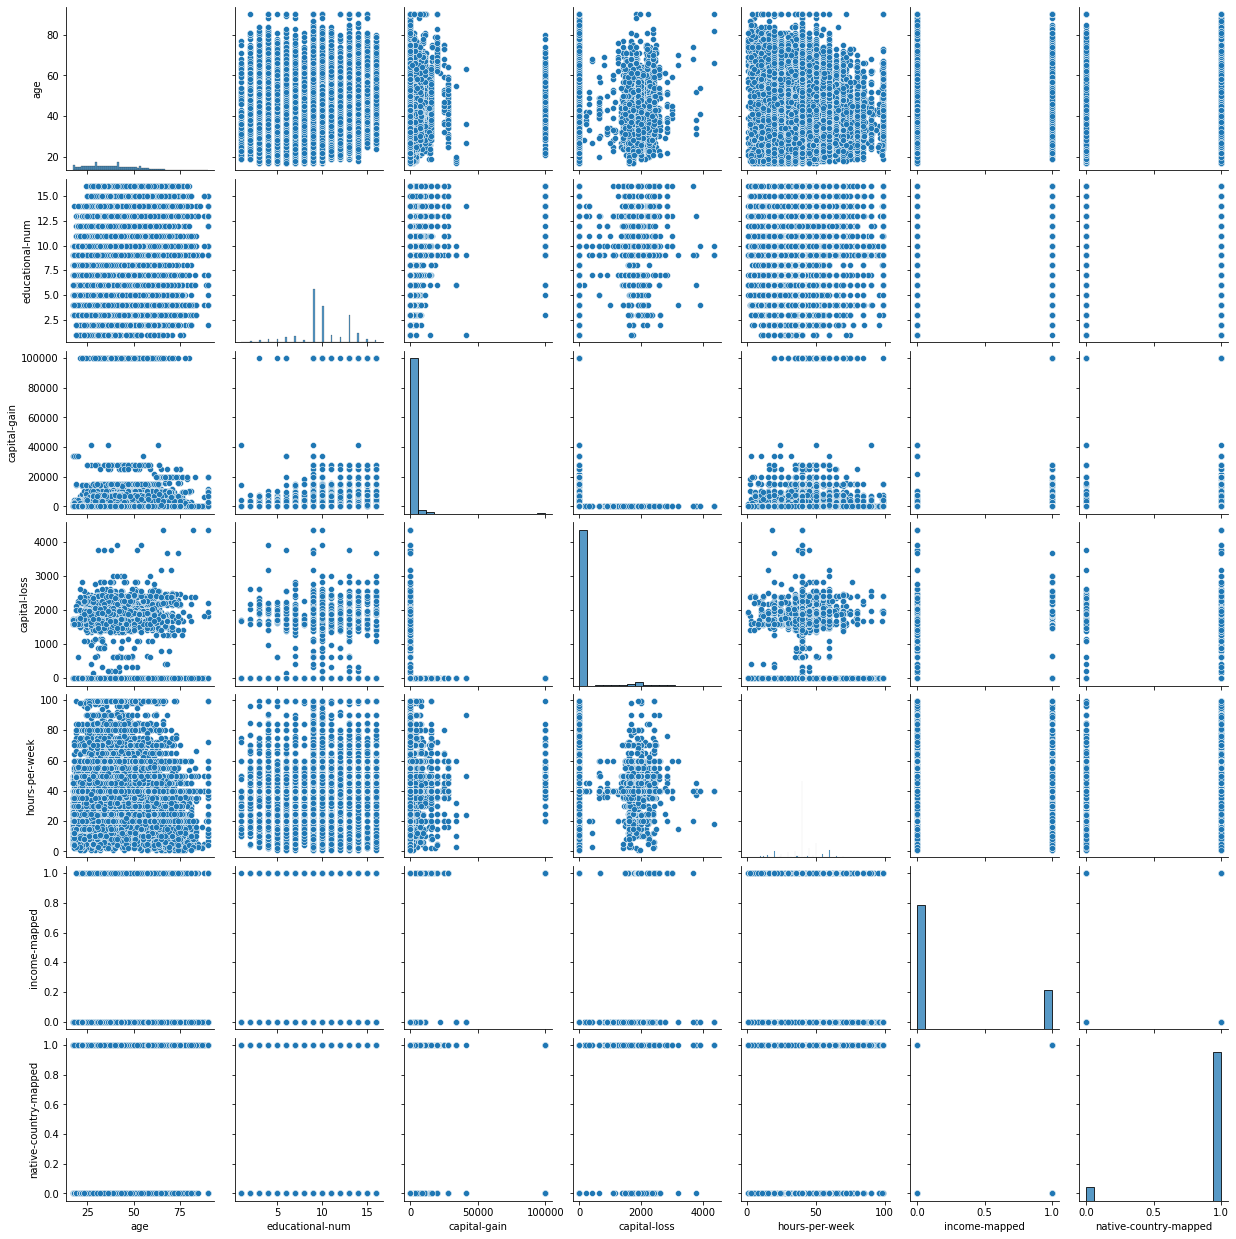

In [42]:
plt.figure(figsize=(10,5))
sns.pairplot(df)

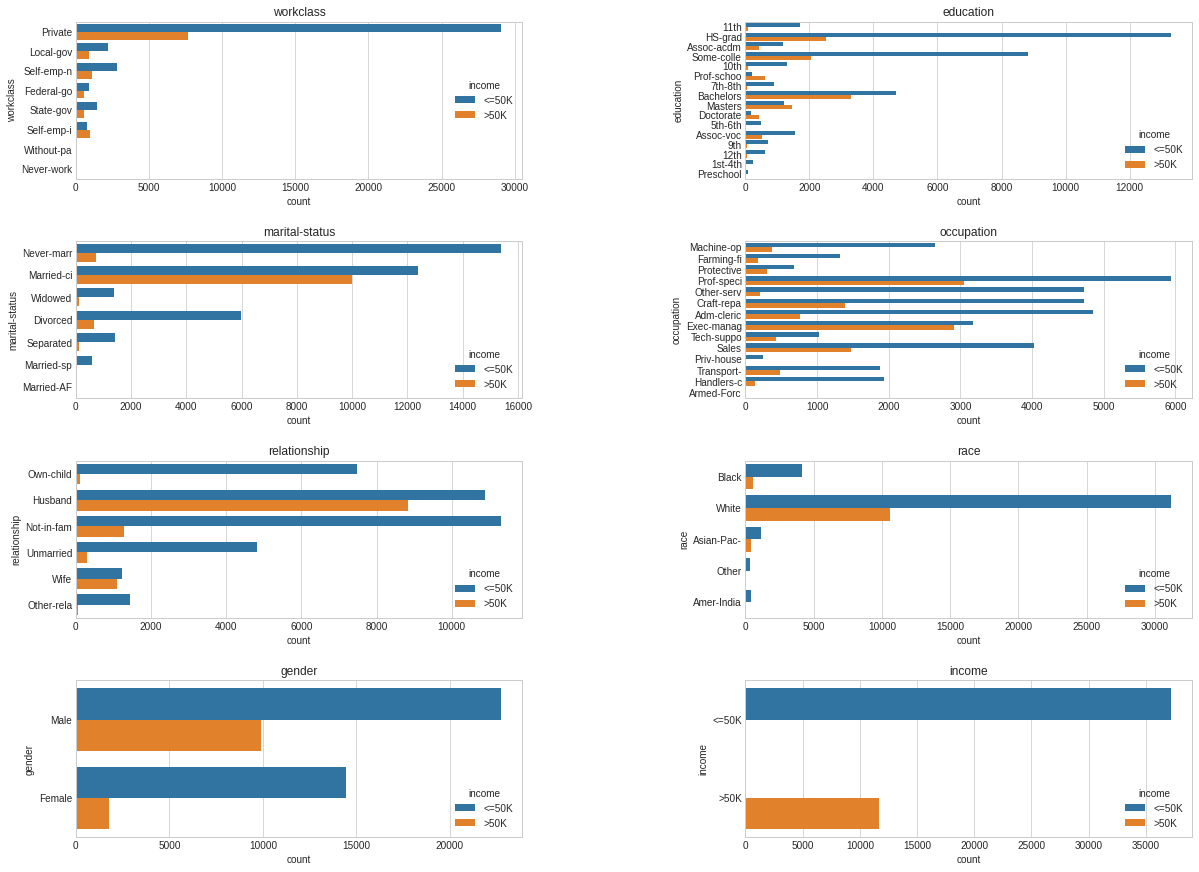

In [43]:
import math

def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = df.loc[:, ['workclass', 'education', 
           'marital-status', 'occupation', 
           'relationship', 'race', 'gender','income']]  

plot_bivariate_bar(bivariate_df, hue='income', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)


DISCRETIZZAZIONE 

In [44]:
df['age-binned']=pd.qcut(df['age'], q=3)


In [45]:
df['hours-per-week'].describe()

count    48842.000000
mean        40.422382
std         12.391444
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

In [46]:
df['hours-per-week-binned']=pd.qcut(df['hours-per-week'], q=2)

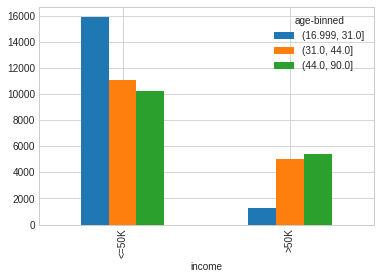

In [47]:
df['income'].groupby(df['age-binned']).value_counts(normalize=False).unstack(0).plot(kind='bar', stacked=False)
plt.show() 

In [109]:
#visto il grafico sopra, binno in tre categorie le ore di lavoro settimanali: sopra le 40, 40 e sotto le 40 ore settimanali
cut_labels = ['<40h', '40h', '>40h']
cut_bins = [0, 39, 40, 99]
df['hours-per-week-binned-3']=pd.cut(df['hours-per-week'], bins=cut_bins, labels=cut_labels)

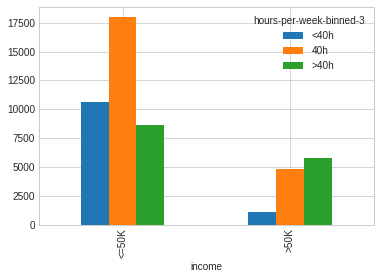

In [110]:
df['income'].groupby(df['hours-per-week-binned-3']).value_counts(normalize=False).unstack(0).plot(kind='bar', stacked=False)
plt.show() 

In [49]:
df['edu']=df['educational-num'].map({1: 'dropout',
                                     2: 'dropout',
                                     3: 'dropout',
                                     4: 'dropout',
                                     5: 'dropout',
                                     6: 'dropout',
                                     7: 'dropout',
                                     8: 'dropout',
                                     9: 'HighGrad',
                                     10: 'CommunityCollege',
                                     11: 'CommunityCollege',
                                     12: 'CommunityCollege',
                                     13: 'Bachelors',
                                     14: 'Masters',
                                     15: 'Masters',
                                     16: 'Doctorate'
                                     })
'''
df['educational-num'].replace('1': 'dropout',inplace=True)
df['educational-num'].replace('2': 'dropout',inplace=True)
df['educational-num'].replace('3': 'dropout',inplace=True)
df['educational-num'].replace('4': 'dropout',inplace=True)
df['educational-num'].replace('5': 'dropout',inplace=True)
df['educational-num'].replace('6': 'dropout',inplace=True)
df['educational-num'].replace('7': 'dropout',inplace=True)
df['educational-num'].replace('8': 'dropout',inplace=True)
df['educational-num'].replace('9': 'HighGrad',inplace=True)
df['educational-num'].replace('10': 'CommunityCollege',inplace=True)
df['educational-num'].replace('11': 'CommunityCollege',inplace=True)
df['educational-num'].replace('12': 'CommunityCollege',inplace=True)
df['educational-num'].replace('13': 'Bachelors',inplace=True)
df['educational-num'].replace('14': 'Masters',inplace=True)
df['educational-num'].replace('15': 'Masters',inplace=True)
df['educational-num'].replace('16': 'Doctorate',inplace=True)'''

"\ndf['educational-num'].replace('1': 'dropout',inplace=True)\ndf['educational-num'].replace('2': 'dropout',inplace=True)\ndf['educational-num'].replace('3': 'dropout',inplace=True)\ndf['educational-num'].replace('4': 'dropout',inplace=True)\ndf['educational-num'].replace('5': 'dropout',inplace=True)\ndf['educational-num'].replace('6': 'dropout',inplace=True)\ndf['educational-num'].replace('7': 'dropout',inplace=True)\ndf['educational-num'].replace('8': 'dropout',inplace=True)\ndf['educational-num'].replace('9': 'HighGrad',inplace=True)\ndf['educational-num'].replace('10': 'CommunityCollege',inplace=True)\ndf['educational-num'].replace('11': 'CommunityCollege',inplace=True)\ndf['educational-num'].replace('12': 'CommunityCollege',inplace=True)\ndf['educational-num'].replace('13': 'Bachelors',inplace=True)\ndf['educational-num'].replace('14': 'Masters',inplace=True)\ndf['educational-num'].replace('15': 'Masters',inplace=True)\ndf['educational-num'].replace('16': 'Doctorate',inplace=True)

#Clustering
Clustering Analysis by K-means
Choice of attributes and distance function
Identification of the best value of k 
Characterization of the obtained clusters by using both analysis of the k centroids and comparison of the distribution of variables within the clusters and that in the whole dataset
Analysis by density-based clustering
Choice of attributes and distance function 
Study of the clustering parameters
Characterization and interpretation of the obtained clusters
Analysis by hierarchical clustering
Choice of attributes and distance function
Show and discuss different dendograms using different algorithms
Final evaluation of the best clustering approach and comparison of the clustering obtained

##Custering Preprocessing

In [50]:
df.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income-mapped,native-country-mapped,age-binned,hours-per-week-binned,edu
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0,1,"(16.999, 31.0]","(0.999, 40.0]",dropout
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0,1,"(31.0, 44.0]","(40.0, 99.0]",HighGrad
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1,1,"(16.999, 31.0]","(0.999, 40.0]",CommunityCollege
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1,1,"(31.0, 44.0]","(0.999, 40.0]",CommunityCollege
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K,0,1,"(16.999, 31.0]","(0.999, 40.0]",CommunityCollege


In [51]:
df_numeric= df.select_dtypes(['number'])
df_numeric

,age,educational-num,capital-gain,capital-loss,hours-per-week,income-mapped,native-country-mapped
0,25,7,0,0,40,0,1
1,38,9,0,0,50,0,1
2,28,12,0,0,40,1,1
3,44,10,7688,0,40,1,1
4,18,10,0,0,30,0,1
...,...,...,...,...,...,...,...
48837,27,12,0,0,38,0,1
48838,40,9,0,0,40,1,1
48839,58,9,0,0,40,0,1
48840,22,9,0,0,20,0,1


Decido di rimuovere una serie di classi per eseguire i cluster che utilizzano la distanza


In [52]:
#df_numeric.drop(['capital-gain'], axis=1, inplace=True)
#df_numeric.drop(['capital-loss'], axis=1, inplace=True)
df_numeric.drop(['income-mapped'], axis=1, inplace=True)
df_numeric.drop(['native-country-mapped'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
df_numeric.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
4,18,10,0,0,30


In [54]:
df_numeric.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


Standardizziamo le variabili così che i confronti tra le distanze degli oggetti non siano falsate da diverse unità di misura e scale delle variabili

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [56]:
X = df_numeric.values

In [57]:
scaler = StandardScaler()

In [58]:
Xs = scaler.fit_transform(X)

##K-Means

In [59]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [60]:
sse_list = list()
sil_list = list()
max_k = 20
for k in range(2, max_k + 1):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(Xs)
  sse_list.append(kmeans.inertia_)
  sil_list.append(silhouette_score(Xs, kmeans.labels_))

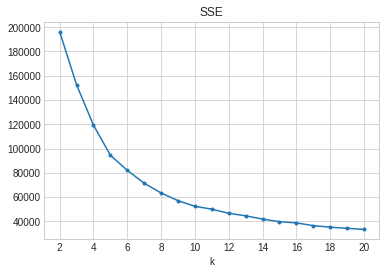

In [61]:
plt.plot(sse_list, marker='.')
plt.xlabel('k')
plt.title('SSE')
plt.xticks(ticks=range(0,19,2), labels=range(2,21,2))
plt.show() 

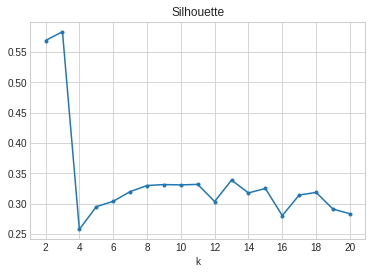

In [62]:
plt.plot(sil_list, marker='.')
plt.xlabel('k')
plt.title('Silhouette')
plt.xticks(ticks=range(0,19,2), labels=range(2,21,2))
plt.show()

Decidiamo di fare clustering con k=5

In [63]:
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=100, random_state= 23)

In [64]:
kmeans.fit(Xs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=23, tol=0.0001, verbose=0)

In [65]:
kmeans.labels_

array([1, 3, 3, ..., 0, 1, 0], dtype=int32)

Osserviamo la dimensione di ogni cluster

In [66]:
labels, size = np.unique(kmeans.labels_, return_counts=True)

for i in range(5):  
  print('Cluster %d: %s (%.2f)' % (labels[i], size[i], size[i]/len(Xs)))

Cluster 0: 12146 (0.25)
Cluster 1: 19357 (0.40)
Cluster 2: 244 (0.00)
Cluster 3: 14857 (0.30)
Cluster 4: 2238 (0.05)


Interpretazione dei cluster.

Visualizziamo i grafici dei cluster relativamente alle variabili utilizzate per il k-means. Visualizziamo anche i centroidi.

In [67]:
centers= scaler.inverse_transform(kmeans.cluster_centers_)
centers

array([[ 5.43246401e+01,  8.61818182e+00,  5.63778527e+02,
         7.53352530e-01,  3.74704237e+01],
       [ 2.76582710e+01,  9.04175484e+00,  1.89465755e+02,
         2.99045161e-01,  3.56288000e+01],
       [ 4.66106557e+01,  1.30245902e+01,  9.99990000e+04,
         2.98427949e-13,  5.04754098e+01],
       [ 3.95388402e+01,  1.24412677e+01,  1.19895064e+03,
         6.91301416e-01,  4.84982468e+01],
       [ 4.17788204e+01,  1.09982127e+01, -1.63709046e-11,
         1.89838472e+03,  4.33440572e+01]])

In [68]:
columns = list(df_numeric.columns) #estraggo il nome delle colonne e lo salvo in una lista --> così nei passaggi successivi posso estrarmi l'indice di tale colonna
columns

['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [69]:
columns.index('age') #estraggo l'indice della colonna

0

In [70]:
columns.index('hours-per-week') #estraggo l'indice della colonna

4

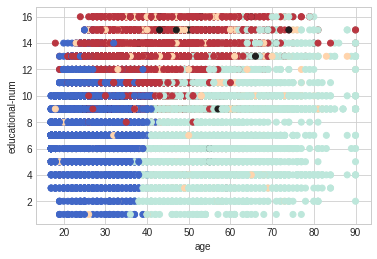

In [71]:
plt.scatter(df_numeric['age'], df_numeric['educational-num'], c=kmeans.labels_,  cmap='icefire')
plt.xlabel('age')
plt.ylabel('educational-num')
plt.show()

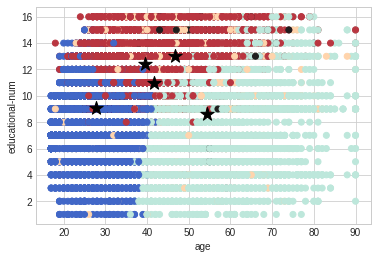

In [72]:
plt.scatter(df_numeric['age'], df_numeric['educational-num'], c=kmeans.labels_, cmap='icefire')
plt.scatter(centers[:,0], centers[:,1], c='k', s=200, marker='*')
plt.xlabel('age')
plt.ylabel('educational-num')
plt.show()

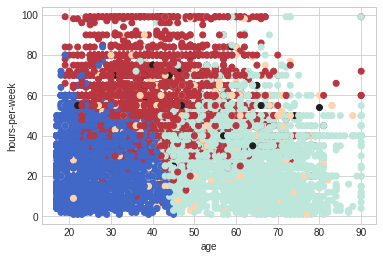

In [73]:
plt.scatter(df_numeric['age'], df_numeric['hours-per-week'], c=kmeans.labels_,  cmap='icefire')
plt.xlabel('age')
plt.ylabel('hours-per-week')
plt.show()

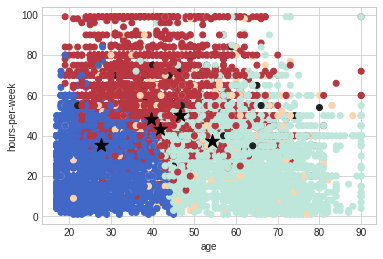

In [74]:
plt.scatter(df_numeric['age'], df_numeric['hours-per-week'], c=kmeans.labels_, cmap='icefire')
plt.scatter(centers[:,0], centers[:,4], c='k', s=200, marker='*')
plt.xlabel('age')
plt.ylabel('hours-per-week')
plt.show()

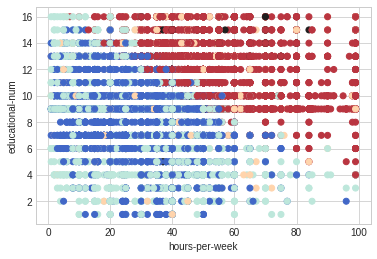

In [75]:
plt.scatter(df_numeric['hours-per-week'], df_numeric['educational-num'], c=kmeans.labels_,  cmap='icefire')
plt.xlabel('hours-per-week')
plt.ylabel('educational-num')
plt.show()

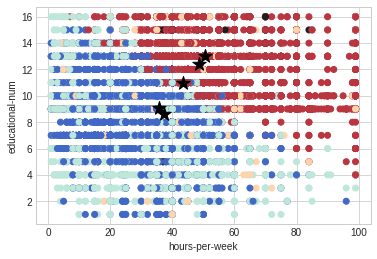

In [76]:
plt.scatter(df_numeric['hours-per-week'], df_numeric['educational-num'], c=kmeans.labels_, cmap='icefire')
plt.scatter(centers[:,4], centers[:,1], c='k', s=200, marker='*')
plt.xlabel('hours-per-week')
plt.ylabel('educational-num')
plt.show()

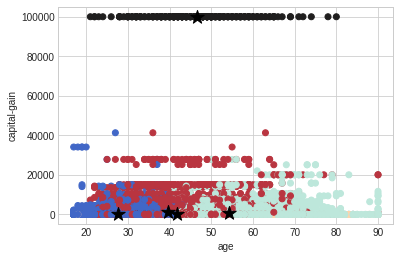

In [77]:
plt.scatter(df_numeric['age'], df_numeric['capital-gain'], c=kmeans.labels_, cmap='icefire')
plt.scatter(centers[:,0], centers[:,2], c='k', s=200, marker='*')
plt.xlabel('age')
plt.ylabel('capital-gain')
plt.show()

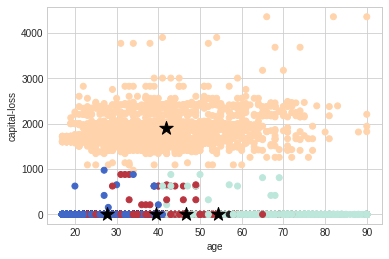

In [78]:
plt.scatter(df_numeric['age'], df_numeric['capital-loss'], c=kmeans.labels_, cmap='icefire')
plt.scatter(centers[:,0], centers[:,3], c='k', s=200, marker='*')
plt.xlabel('age')
plt.ylabel('capital-loss')
plt.show()

Visualizziamo i cluster con parallel coordinates

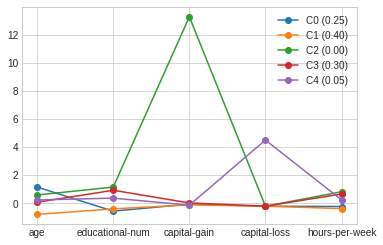

In [79]:
for i in range(len(kmeans.cluster_centers_)):
  plt.plot(kmeans.cluster_centers_[i], marker='o', label='C%s (%.2f)' % (i, size[i]/len(Xs)))
plt.xticks(range(len(columns)), columns) #aggiungo il nome ai tick dell'asse x
plt.legend() #aggiungo la legenda
plt.show()

#mostro il grafico in maniera incrementale per il numero di k
#è grafico normalizzato!

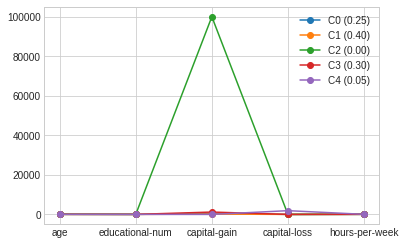

In [80]:
for i in range(len(kmeans.cluster_centers_)):
  plt.plot(centers[i], marker='o', label='C%s (%.2f)' % (i, size[i]/len(Xs)))
plt.xticks(range(len(columns)), columns)
plt.legend()
plt.show()

#così invece abbiamo grafico denormalizzato --> leggo i valori assoluti reali ma è più difficile il confonto

In [81]:
 df_numeric['n_cluster']= kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


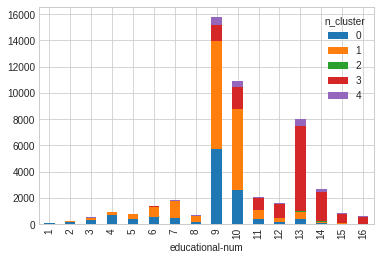

In [82]:
df_numeric['n_cluster'].groupby(df_numeric['educational-num']).value_counts().unstack(1).plot(kind='bar', stacked=True)
plt.show() 

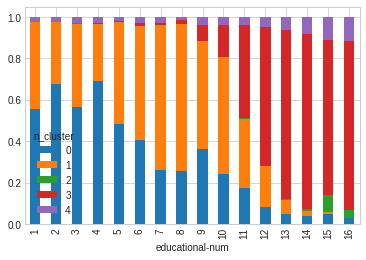

In [83]:
df_numeric['n_cluster'].groupby(df_numeric['educational-num']).value_counts(normalize=True).unstack(1).plot(kind='bar', stacked=True)
plt.show() 

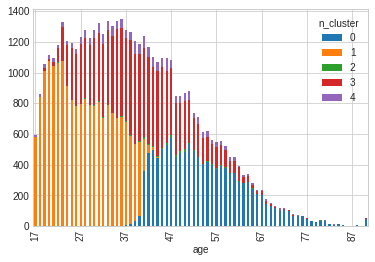

In [84]:
df_numeric['n_cluster'].groupby(df_numeric['age']).value_counts().unstack(1).plot(kind='bar', stacked=True)
plt.xticks(ticks=range(0,74,10), labels=range(17,91,10))
plt.show() 

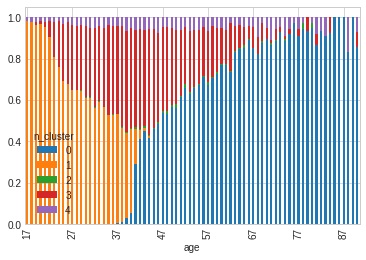

In [85]:
df_numeric['n_cluster'].groupby(df_numeric['age']).value_counts(normalize=True).unstack(1).plot(kind='bar', stacked=True)
plt.xticks(ticks=range(0,74,10), labels=range(17,91,10))
plt.show()

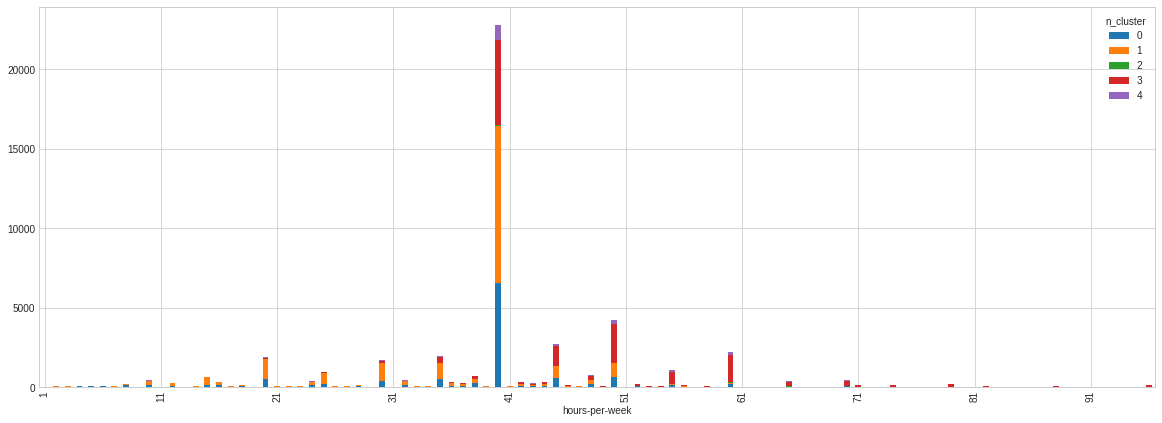

In [86]:
df_numeric['n_cluster'].groupby(df_numeric['hours-per-week']).value_counts().unstack(1).plot(kind='bar', stacked=True, figsize=(20,7))
plt.xticks(ticks=range(0,98,10), labels=range(1,99,10))
plt.show()

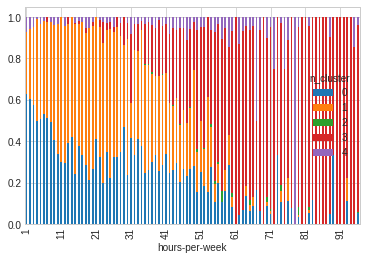

In [87]:
df_numeric['n_cluster'].groupby(df_numeric['hours-per-week']).value_counts(normalize=True).unstack(1).plot(kind='bar', stacked=True)
plt.xticks(ticks=range(0,98,10), labels=range(1,99,10))
plt.show() 

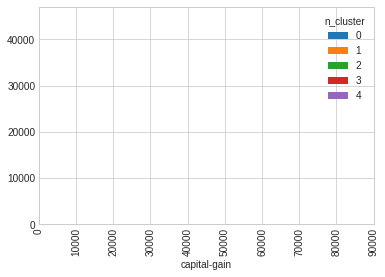

In [88]:
df_numeric['n_cluster'].groupby(df_numeric['capital-gain']).value_counts().unstack(1).plot(kind='bar', stacked=True) #, figsize=(20,7))
plt.xticks(ticks=range(0,99999,10000), labels=range(0,99999,10000))
plt.show()

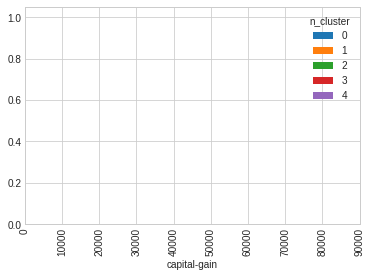

In [89]:
df_numeric['n_cluster'].groupby(df_numeric['capital-gain']).value_counts(normalize=True).unstack(1).plot(kind='bar', stacked=True)
plt.xticks(ticks=range(0,99999,10000), labels=range(0,99999,10000))
plt.show()

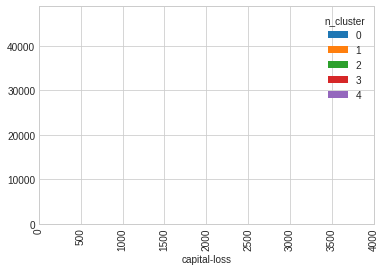

In [90]:
df_numeric['n_cluster'].groupby(df_numeric['capital-loss']).value_counts().unstack(1).plot(kind='bar', stacked=True) #, figsize=(20,7))
plt.xticks(ticks=range(0,4356,500), labels=range(0,4356,500))
plt.show()

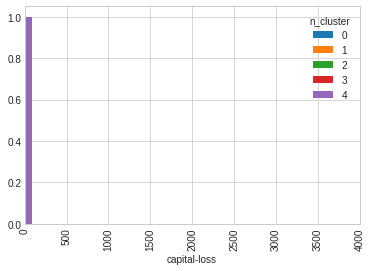

In [91]:
df_numeric['n_cluster'].groupby(df_numeric['capital-loss']).value_counts(normalize=True).unstack(1).plot(kind='bar', stacked=True) #, figsize=(20,7))
plt.xticks(ticks=range(0,4356,500), labels=range(0,4356,500))
plt.show()

##DB Scan

In [92]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [93]:
'''sil_list = list()
n_noise_=[]
for i in range(1, 10):
  dbscan = DBSCAN(eps=i/10, min_samples=100)
  dbscan.fit(Xs)
  labels=dbscan.labels_
  sil_list.append(metrics.silhouette_score(Xs, labels))
'''

'sil_list = list()\nn_noise_=[]\nfor i in range(1, 10):\n  dbscan = DBSCAN(eps=i/10, min_samples=100)\n  dbscan.fit(Xs)\n  labels=dbscan.labels_\n  sil_list.append(metrics.silhouette_score(Xs, labels))\n'

In [94]:
sil_nonoise = list()

for i in range(1, 10):
  dbscan = DBSCAN(eps=i/10, min_samples=100)
  dbscan.fit(Xs)
  X_no_noise = list()
  labels_no_noise = list()
  for j in range(len(Xs)):
    if dbscan.labels_[j] != -1:
      X_no_noise.append(Xs[j])
      labels_no_noise.append(dbscan.labels_[j])
  if 1 in dbscan.labels_:
      sil_nonoise.append(metrics.silhouette_score(X_no_noise, labels_no_noise))
     

In [95]:
sil_nonoise

[0.0714785840317434,
 -0.14181443039527705,
 -0.07164190211338882,
 0.35665865762181503,
 0.6138993238892396,
 0.5789960637994684,
 0.5644273402875506,
 0.5781513691925955,
 0.5763546665486429]

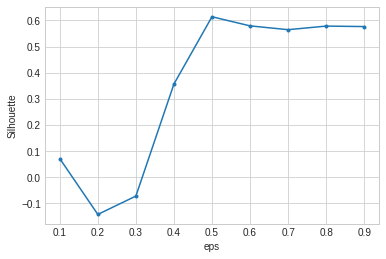

In [96]:
x=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
plt.plot(x, sil_nonoise, marker='.')
plt.xlabel('eps')
plt.ylabel('Silhouette')
plt.show()

In [97]:
dbscan = DBSCAN(eps=0.5, min_samples=100, metric='euclidean')

dbscan.fit(Xs)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=100, n_jobs=None, p=None)

In [98]:
labels=dbscan.labels_
np.unique(labels)

array([-1,  0,  1])

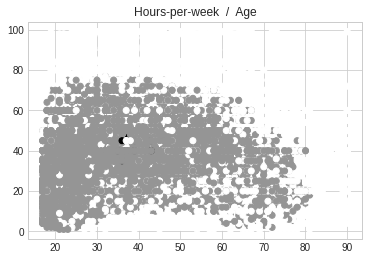

In [99]:
plt.scatter(df['age'], df['hours-per-week'], c=labels)
plt.title('Hours-per-week  /  Age')
plt.show()

In [100]:
df_numeric['n_cluster']= labels

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


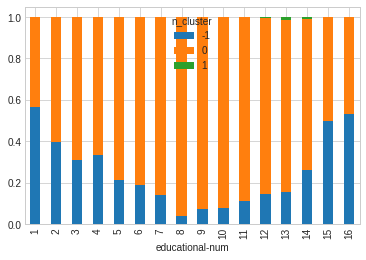

In [101]:
df_numeric['n_cluster'].groupby(df_numeric['educational-num']).value_counts(normalize=True).unstack(1).plot(kind='bar', stacked=True)

plt.show() 

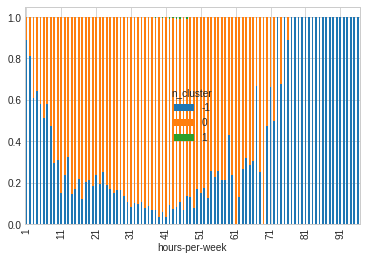

In [112]:
df_numeric['n_cluster'].groupby(df_numeric['hours-per-week']).value_counts(normalize=True).unstack(1).plot(kind='bar', stacked=True)
plt.xticks(ticks=range(0,98,10), labels=range(1,99,10))
plt.show() 

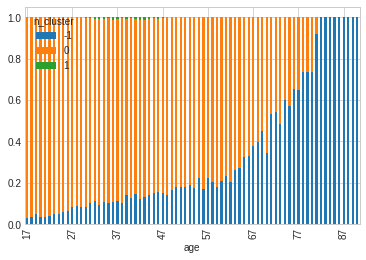

In [114]:
df_numeric['n_cluster'].groupby(df_numeric['age']).value_counts(normalize=True).unstack(1).plot(kind='bar', stacked=True)
plt.xticks(ticks=range(0,72,10), labels=range(17,91,10))
plt.show() 

In [102]:
from scipy.spatial.distance import pdist, squareform

In [103]:
labels, size = np.unique(labels, return_counts=True)

In [104]:
for i in range(3):  
  print('Cluster %d: %s (%.2f)' % (labels[i], size[i], size[i]/len(Xs)))

Cluster -1: 6428 (0.13)
Cluster 0: 42252 (0.87)
Cluster 1: 162 (0.00)


In [105]:
#D = pdist(Xs, metric='euclidean')

In [106]:
#D = squareform(D)

In [107]:
'''min_pts = 4
min_pts_distances = list()
for distances_of_a_record in D:
  print(sorted(distances_of_a_record)[min_pts])
  break
  val = sorted(distances_of_a_record)[min_pts]
  min_pts_distances.append(val)'''

'min_pts = 4\nmin_pts_distances = list()\nfor distances_of_a_record in D:\n  print(sorted(distances_of_a_record)[min_pts])\n  break\n  val = sorted(distances_of_a_record)[min_pts]\n  min_pts_distances.append(val)'

In [108]:
'''plt.plot(range(len(Xs)), sorted(min_pts_distances))
plt.xlabel('records sorted by distances')
plt.ylabel('distances from the %s-th neighbor' % min_pts)
plt.show()

SyntaxError: ignored

Hierarchical

In [ ]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [ ]:
#D = pdist(Xs, metric='euclidean')

In [ ]:
#data_link = linkage(D, method='complete', metric='euclidean')

In [ ]:
#res = dendrogram(data_link, color_threshold=1.0, truncate_mode='lastp')

In [ ]:
#labels = fcluster(data_link, t=0.2, criterion='distance')


In [ ]:
#silhouette_score(Xs, labels)

#Classification
Learning of different decision trees/classification algorithms with different parameters and gain formulas with the object of maximizing the performances
Decision trees interpretation, validation with test and training set
Training of different KNN classifiers with different parameters with the object of maximizing the performances
Discussion of the best prediction model

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder

In [ ]:
df_C = df.copy(deep=True)
df_C.head(2)

In [ ]:
df_C.drop(['education'],inplace=True, axis=1)
df_C.drop(['educational-num'],inplace=True, axis=1)
df_C.drop(['occupation'],inplace=True, axis=1)
df_C.drop(['native-country'],inplace=True, axis=1)
df_C.drop(['age'],inplace=True, axis=1)

In [ ]:
df_C.drop(['income'],inplace=True, axis=1)
df_C.drop(['hours-per-week'],inplace=True, axis=1)


In [ ]:
#df_C.drop(['marital-status'],inplace=True, axis=1)

In [ ]:
df_C.drop(['capital-gain'],inplace=True, axis=1)

In [ ]:
df_C.drop(['capital-loss'],inplace=True, axis=1)

In [ ]:
df_C.drop(['workclass'],inplace=True, axis=1)

In [ ]:
df_C['HPW']= df_C['hours-per-week-binned']

In [ ]:
df_C.drop(['hours-per-week-binned'],inplace=True, axis=1)

In [ ]:
df_C.drop(['relationship'],inplace=True, axis=1)

In [ ]:
df_C['gender']= [1 if i == 'Female' else 0 for i in df_C['gender']]

In [ ]:
df_C['race']= [1 if i == 'White' else 0 for i in df_C['race']]

In [ ]:
df_C_encoded = pd.get_dummies(df_C)
df_C_encoded

In [ ]:
attributes = [col for col in df_C_encoded.columns if col != 'income-mapped']
X = df_C_encoded[attributes].values
y = df_C_encoded['income-mapped']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.15,
                                                    random_state = 23,
                                                    stratify=y)

##Decision Tree

In [ ]:
from sklearn.tree import plot_tree
import pydotplus
from sklearn import tree
from IPython.display import Image

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
param_list = {
    'max_depth': [2, 3, 4, None],
    'min_samples_leaf': [1, 2, 3],
    'criterion': ['gini']
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=param_list, cv=3)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

In [ ]:
random_search = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_list, cv=3, n_iter=10)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_

In [ ]:
random_search.cv_results_['params'][0]

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=4, 
                             min_samples_leaf=1, min_samples_split=2)
clf.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(17,17)) 
plot_tree(clf, feature_names=attributes, fontsize=7,filled=True, class_names=True)
plt.show()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
accuracy_train_list = list()
accuracy_test_list = list()
for md in range(2, 20):
  clf = DecisionTreeClassifier(max_depth=md)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  y_pred_train = clf.predict(X_train)
  accuracy_train_list.append(accuracy_score(y_train, y_pred_train))
  accuracy_test_list.append(accuracy_score(y_test, y_pred))

In [ ]:
plt.plot(range(2, 20), accuracy_train_list, label='train')
plt.plot(range(2, 20), accuracy_test_list, label='test')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
import pydotplus
from sklearn import tree
from IPython.display import Image

In [ ]:
!pip install scikit-plot

In [ ]:
from scikitplot.metrics import plot_roc

In [ ]:
y_proba = clf.predict_proba(X_test)

In [ ]:
plot_roc(y_test, y_proba)
plt.show()

##KNN

In [ ]:
df_K= df.copy(deep=True)
df_K.head()

In [ ]:
df_K.drop(['education'],inplace=True, axis=1)
df_K.drop(['workclass'],inplace=True, axis=1)
#df_K.drop(['marital-status'],inplace=True, axis=1)
df_K.drop(['occupation'],inplace=True, axis=1)
df_K.drop(['relationship'],inplace=True, axis=1)
#df_K.drop(['educational-num'],inplace=True, axis=1)
df_K.drop(['native-country-mapped'],inplace=True, axis=1)
df_K.drop(['native-country'],inplace=True, axis=1)
df_K.drop(['age-binned'],inplace=True, axis=1)
df_K.drop(['hours-per-week-binned'],inplace=True, axis=1)
df_K.drop(['income'],inplace=True, axis=1)
df_K.drop(['edu'],inplace=True, axis=1)

In [ ]:
df_K.head()

In [ ]:
df_K = pd.get_dummies(df_K)
df_K.head()

In [ ]:
df_K= df_K.select_dtypes(['number'])
df_K.head

In [ ]:
attributes = [col for col in df_K.columns if col != 'income-mapped']
X = df_K[attributes].values
y = df_K['income-mapped']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.15,
                                                    random_state = 23,
                                                    stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# empty variable for storing the KNN metrics
scores=[]

lrange=list(range(1,20))
# loop the KNN process
for k in lrange:
  # input the k value and 'distance' measure
  knn=KNeighborsClassifier(n_neighbors=k)
  # input the train data to train KNN
  knn.fit(X_train, y_train.ravel())
  # see KNN prediction by inputting the test data
  y_pred=knn.predict(X_test)
  # append the performance metric (accuracy)
  scores.append(metrics.accuracy_score(y_test,y_pred))
plt.figure(2,figsize=(15,5))


optimal_k = lrange[scores.index(max(scores))]
print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))

# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)

In [ ]:
f1_score(y_test, y_pred, average=None)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
!pip install scikit-plot

In [ ]:
from scikitplot.metrics import plot_roc

In [ ]:
y_proba = knn.predict_proba(X_test)

In [ ]:
plot_roc(y_test, y_proba)
plt.show()

#Pattern Mining


In [ ]:
df_PM=df.copy(deep=True)
df_PM.head()

In [ ]:
df_PM.nunique()

In [ ]:
df_PM['capital-gain']=[1 if i !=0 else 0 for i in df['capital-gain']]
df_PM['capital-loss']=[1 if i !=0 else 0 for i in df['capital-gain']]

In [ ]:
df['occupation'].unique()

In [ ]:
df_PM['native-country']=['USA' if i ==1 else 'Outside-USA' for i in df['native-country-mapped']]

In [ ]:
df_PM.nunique()

In [ ]:
df_PM.head()

In [ ]:
df_PM.drop(['educational-num', 'age','native-country','hours-per-week','education','income-mapped','native-country-mapped'], axis=1, inplace=True)

In [ ]:
df_PM['age-binned'] = df_PM['age-binned'].astype(str) + '_age-class'
df_PM['hours-per-week-binned'] = df_PM['hours-per-week-binned'].astype(str) + '_hours-per-week'
df_PM['capital-gain'] = df_PM['capital-gain'].astype(str) + '_gain'
df_PM['capital-loss'] = df_PM['capital-loss'].astype(str) + '_loss'

In [ ]:
df_PM.head()

In [ ]:
baskets = df_PM.values.tolist()

In [ ]:
!pip install pyfim

In [ ]:
from fim import apriori

In [ ]:
itemsets_A = apriori(baskets, target='a', supp=20, zmin=2)
itemsets_M = apriori(baskets, target='m', supp=20, zmin=2)
itemsets_C = apriori(baskets, target='c', supp=20, zmin=2)

In [ ]:
itemsets_A[0][0] #il più frequente

In [ ]:
itemsets_A[1:11]


In [ ]:
len_itemsets= []

for conf_val in range(50, 80+1):
  itemsets_A=apriori(baskets, target='a',supp=15,conf=conf_val, zmin=2)
  len_itemsets.append(len(itemsets_A))

plt.plot(len_itemsets)
plt.show()

In [ ]:
len_itemsets= []

for sup_val in range(1, 30+1):
  itemsets_A=apriori(baskets, target='a', supp=sup_val, zmin=2)
  len_itemsets.append(len(itemsets_A))

plt.plot(len_itemsets)
plt.show()

In [ ]:
len_itemsets= []

for sup_val in range(1, 30+1):
  itemsets_A=apriori(baskets, target='a', supp=sup_val, zmin=2)
  len_itemsets.append(len(itemsets_A))

plt.plot(len_itemsets)
plt.show()

In [ ]:
len_itemsets= []

for sup_val in range(1, 30+1):
  itemsets_M=apriori(baskets, target='m', supp=sup_val, zmin=2)
  len_itemsets.append(len(itemsets_M))

plt.plot(len_itemsets)
plt.show()

In [ ]:
len_itemsets= []

for sup_val in range(1, 30+1):
  itemsets_C=apriori(baskets, target='c', supp=sup_val, zmin=2)
  len_itemsets.append(len(itemsets_C))

plt.plot(len_itemsets)
plt.show()

In [ ]:
rules = apriori(baskets, target='r', supp=15, conf=80, zmin=2, report='ascl')

In [ ]:
len(rules)

In [ ]:
rules[0][0:2] #regola : 1 implica 0
rules[0][3] #supp
rules[0][4] #conf
rules[0][3] #lift

In [ ]:
interesting_rules=[]
for i in range(len(rules)):
  if rules[i][5]>=1.26:
    interesting_rules.append(rules[i])
    #print(interesting_rules[i][1],'-->', interesting_rules[i][0],'with Lift: ',interesting_rules[i][5])

In [ ]:
len(interesting_rules)

In [ ]:
interesting_rules_income=[]
for i in range(len(interesting_rules)):
  if '>50K' in interesting_rules[i] or '<=50K' in interesting_rules[i]:
    interesting_rules_income.append(interesting_rules[i])
    print(interesting_rules[i][1],'-->', interesting_rules[i][0],'with Lift: ',interesting_rules[i][5])

In [ ]:
len(interesting_rules_income)

In [ ]:
print(len(rules))

In [ ]:
lifts=[]
for i in range(len(rules)):
  lifts.append(rules[i][5])
lifts.sort()

In [ ]:
max_lift = lifts[len(lifts)-1]
min_lift = lifts[0]

In [ ]:
for i in range(len(rules)):
  if rules[i][5]==max_lift:
    rule_max_lift=rules[i]
  elif rules[i][5]==min_lift:
    rule_min_lift = rules[i]

In [ ]:
print('Rule with highest lift is: ',rule_max_lift[1],'-->',rule_max_lift[0], ', and has lift: ',rule_max_lift[5] )
print('Rule with lowest lift is: ',rule_min_lift[1],'-->',rule_min_lift[0], ', and has lift: ',rule_min_lift[5] )


In [ ]:
#proveeee

In [ ]:
df_PM.drop(['relationship'], axis=1, inplace=True)

In [ ]:
df_PM.drop(['marital-status'], axis=1, inplace=True)